* PyTorch 를 import 할 것.

In [1]:
import torch

* 몇 가지 기본적인 tensor 조작을 알아봄.
* 처음으로 tensor 들을 만드는 몇 가지 방법을 살펴봄.

In [2]:
z = torch.zeros(5, 3)
print(z)
print(z.dtype)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
torch.float32


* 위에서, 0으로 채워진 5x3 행렬을 만들고, 파이토치의 기본 타입인, 0으로 채워진 32비트 부동소수점 데이터 타입인지 확인함.
* 만약 정수형 데이터 타입을 원한다면 기본값을 재정의할 수 있음.

In [3]:
i = torch.ones((5, 3), dtype=torch.int16)
print(i)

tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]], dtype=torch.int16)


* dtype의 기본값을 변경하면 tensor가 출력될 때 데이터 타입을 확인할 수 있음.
* 학습 가중치를 무작위로 초기화하는 것이 일반적이며, 종종 결과의 재현성을 위해 PRNG에 대한 특정 시드로 초기화함.

In [4]:
torch.manual_seed(1729)
r1 = torch.rand(2, 2)
print('랜덤 tensor 값:')
print(r1)

r2 = torch.rand(2, 2)
print('\n다른 랜덤 tensor 값:')
print(r2) # 새로운 2x2 행렬 값

torch.manual_seed(1729)
r3 = torch.rand(2, 2)
print('\nr1과 일치:')
print(r3) # 동일한 시드값으로 인해 r1 값이 반복되어 행렬값으로 나옴.

랜덤 tensor 값:
tensor([[0.3126, 0.3791],
        [0.3087, 0.0736]])

다른 랜덤 tensor 값:
tensor([[0.4216, 0.0691],
        [0.2332, 0.4047]])

r1과 일치:
tensor([[0.3126, 0.3791],
        [0.3087, 0.0736]])


* PyTorch tensor는 산술 연산을 직관적으로 수행함.
* 유사한 shape의 tensor들이 더하거나 곱하거나 그 외 연산도 가능함.
* 스칼라를 사용한 연산은 tensor에 분산됨.

In [5]:
ones = torch.ones(2, 3)
print(ones)

twos = torch.ones(2, 3)
print(twos)

threes = ones + twos
print(threes)
print(threes.shape)

r1 = torch.rand(2, 3)
r2 = torch.rand(3, 2)
# 런타임 오류를 발생시키려면 아래 줄의 주석을 해제함.
# r3 = r1 + r2

tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[2., 2., 2.],
        [2., 2., 2.]])
torch.Size([2, 3])


* 다음은 사용 가능한 작은 수학 연산 예제

In [6]:
r = (torch.rand(2, 2) - 0.5) # -1과 1 사이의 값을 가짐.
print('랜덤 행렬값, r:')
print(r)

# 일반적인 수학적 연산은 다음과 같이 지원됨.
print('\nr의 절대값:')
print(torch.abs(r))

# 삼각함수를 사용할 수 있음.
print('\nr의 역 사인 함수:')
print(torch.asin(r))

# 행렬식 및 특이값 분해와 같은 선형 대수 연산을 사용할 수 있음.
print('\nr의 행렬식')
print(torch.det(r))
print('\nr의 특이값 분해')
print(torch.svd(r))

# 통계 및 집합 연산 등을 사용할 수 있음.
print('\nr의 평균 및 표준편차:')
print(torch.std_mean(r))
print('\nr의 최대값')
print(torch.max(r))

랜덤 행렬값, r:
tensor([[ 0.4978, -0.1116],
        [ 0.1929, -0.3297]])

r의 절대값:
tensor([[0.4978, 0.1116],
        [0.1929, 0.3297]])

r의 역 사인 함수:
tensor([[ 0.5211, -0.1118],
        [ 0.1941, -0.3359]])

r의 행렬식
tensor(-0.1426)

r의 특이값 분해
torch.return_types.svd(
U=tensor([[-0.8353, -0.5497],
        [-0.5497,  0.8353]]),
S=tensor([0.5897, 0.2418]),
V=tensor([[-0.8851, -0.4654],
        [ 0.4654, -0.8851]]))

r의 평균 및 표준편차:
(tensor(0.3608), tensor(0.0624))

r의 최대값
tensor(0.4978)


* GPU에서 병렬 연산을 위해 설정하는 방법을 포함하여 PyTorch tensor의 강력함에 대해 알아야할 것이 있음.

### PyTorch Models

* PyTorch에서 Model을 표현할 수 있는 방법에 대해 알아보겠음.

In [7]:
import torch # PyTorch 모든 모듈 가져오기
import torch.nn as nn # torch.nn.Module의 경우 PyTorch model의 부모 객체
import torch.nn.functional as F # 활성화 함수 모듈 가져오기

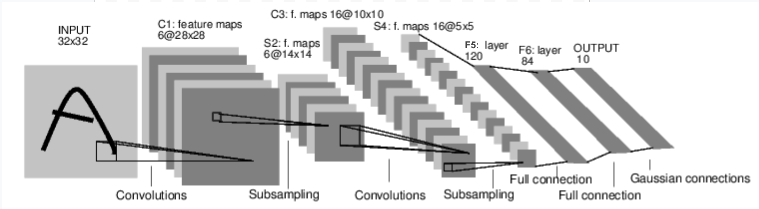

In [8]:
from IPython.display import Image
Image("https://tutorials.pytorch.kr/_images/mnist.png")

* LeNet-5의 다이어그램은 초기 합성곱 신경망 중 하나이자 딥 러닝에서 폭발적인 인기를 일으킨 요인중 하나임.
* 손으로 쓴 숫자 이미지(MNIST 데이터셋)를 읽고 이미지에 어떤 숫자가 표현되었는지 정확하게 분류하기 위해 제작됨.

* LeNet-5가 어떻게 동작하는지에 대한 간단한 설명은 다음과 같음.
  - 계층 C1은 합성곱 계층임. 즉, 입력 이미지에서 학습 중에 배웠던 특징을 검색함. 이미지에서 학습된 각 특징을 위치에 대한 출력 맵을 보여줌. 이 "활성화 맵"으로 S2 계층에서 다운샘플링됨.
  - 계층 C3는 다른 합성곱 계층으로, 이 시점은 특징들의 조합을 위해 C1 활성화 맵 검색함. 또한, 계층 S4에서 다운샘플링된 이러한 특징 조합의 spatial locations을 제공함.
  - 마지막으로, 완전 연결 계층(fully-connected layers)인 F5, F6, OUTPUT은 최종 활성화 맵을 가져와 십진수를 표현하는 10개의 bin 중 하나로 분류하는 분류기.

* 이 간단한 신경망을 코드로 어떻게 표현할 수 있는지 다음과 같이 알아보기.

In [9]:
class LeNet(nn.Module):

  def __init__(self):
    super(LeNet, self).__init__()
    # 입력 이미지 채널, 6개의 output 채널, 5x5 정방 합성곱 커널을 사용함.
    self.conv1 = nn.Conv2d(1, 6, 5)
    self.conv2 = nn.Conv2d(6, 16, 5)
    # 아핀 변환: y = Wx + b
    self.fc1 = nn.Linear(16 * 5 * 5, 120) # 5x5 이미지 차원
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)

  def forward(self, x):
    # 최대 풀링은 (2, 2) 윈도우 크기를 사용함.
    x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
    # 크기가 정방 사이즈인 경우, 단일 숫자만 지정할 수 있음.
    x = F.max_pool2d(F.relu(self.conv2(x)), 2)
    x = x.view(-1, self.num_flat_features(x))
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

  def num_flat_features(self, x):
    size = x.size()[1:] # 크기는 배치 차원을 제외한 모든 차원을 가져옴.
    num_features = 1
    for s in size:
      num_features *= s
    return num_features

* 코드를 살펴보면 구조적으로 위 다이어그램과 유사점을 발견할 수 있음.
* 다음은 일반적인 PyTorch 모델의 구조를 보여줌.
  - 모듈은 중첩될 수 있으며 torch.nn.Module 에서 상속됨.
  - 실제로, Conv2d와 Linear 계층 클래스도 torch.nn.Module 에서 상속됨.
  - 모델은 계층을 인스턴스화하고 필요한 데이터 아티팩트를 로드하는 \_\_init__() 함수를 가지고 있음. (예를 들면 NLP 모델은 어휘를 불러올 수 있음.)
  - 모델은 forward() 함수를 가지고 있음. 여기서 실제 계산이 수행됨. 입력은 네트워크 계층 및 다양한 기능들을 통과시켜 결과를 생성함.
  - 그 외에는 다른 파이썬 클래스처럼 모델 클래스를 구성할 수 있음. Python 클래스, 모델의 계산을 지원하는 데 필요한 속성 및 메서드를 추가함.

* 이제 만든 오브젝트를 인스턴스화하고 샘플 입력을 통해 실행함.

In [10]:
net = LeNet()
print(net) # 인스턴스한 객체를 출력하면 어떤 값을 보여줄지 확인해보기.

input = torch.rand(1, 1, 32, 32) # 32x32 크기의 1채널의 흑백 이미지를 만듦.
print('\n이미지 배치 shape:')
print(input.shape)

output = net(input) # 객체로부터 직접 forward() 함수를 호출하지 않음.
print('\n:결과 값')
print(output)
print(output.shape)

LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

이미지 배치 shape:
torch.Size([1, 1, 32, 32])

:결과 값
tensor([[ 0.0898,  0.0318,  0.1485,  0.0301, -0.0085, -0.1135, -0.0296,  0.0164,
          0.0039,  0.0616]], grad_fn=<AddmmBackward0>)
torch.Size([1, 10])


* 위에서 몇 가지 중요한 일들이 일어나고 있음.
* 첫째, LeNet 클래스를 인스턴스화하고 net 객체를 출력함.
* torch.nn.Module 의 하위 클래스는 생성된 레이어의 모양과 파라미터를 알려줌.
* 모델의 처리 결과를 얻으려는 경우, 모델의 편리한 기능을 제공할 수 있음.
* 아래에서 1 채널과 32x32 이미지 크기를 가진 더미 입력을 생성함.
* 일반적으로 배치 이미지를 읽어들이고, 이미지와 같은 크기의 텐서로 변환함.
* tensor 의 추가 차원인 batch 차원을 알아챘을 수 있음.
* PyTorch 모델은 데이터의 batch 에 작업한다고 가정.
* 예를 들어, 16개 이미지의 배치는 (1, 1, 32, 32) 모양을 가질 것.
* 이 샘플에서는 하나의 이미지만 사용하기 때문에 (1, 1, 32, 32) 모양을 가진 batch를 만듦.

* 모델을 함수처럼 net(input) 를 호출하여 추론을 요청.
* 호출의 결과는 입력 이미지가 특정 숫자를 나타내는 모델의 신뢰도를 나타냄. (모델의 인스턴스는 아직 아무것도 학습하지 않았기 때문에 출력에서 좋은 결과를 기대해서는 안됨.)
* output 결과를 확인해보면 batch 차원을 가지고 있다는 것을 알 수 있는데, 크기는 항상 입력 batch 차원과 일치해야 함.
* 만약 16개의 인스턴스로 이루어진 입력으로 모델을 통과했다면 output 는 (16, 10) 의 형태를 가지고 있음.

### Datasets 및 Dataloaders
* TorchVision에서 바로 다운로드할 수 있는 오픈 데이터셋 중 하나를 사용하여 모델을 통해 이미지를 변환하는 방법, DataLoader를 사용하여 모델에 데이터 배치를 제공하는 방법을 학습함.

* 첫 번째 할 일은 들어오는 이미지를 Pytorch tensor로 변환하는 것.

In [11]:
#%matplotlib inline

import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)

* 여기서는 입력에 대한 두 가지 변환을 지정함.
  - "transforms.ToTensor()"는 Pillow 패키지를 사용하여 불러온 이미지를 PyTorch tensor 형태로 변환함.
  - transforms.Normalize() 는 tensor의 평균이 0이고 표준 편차가 0.5가 되도록 tensor의 값을 조정함.
  - 대부분의 활성화 함수는 약 x=0에 강한 기울기 값을 가지고 있어 데이터를 중앙으로 집중화하여 학습 속도를 높일 수 있음.

* Transforms 는 cropping, centering, rotation, reflection 를 포함하여 더 많은 변환이 가능함.
* 다음으로 CIFAR10 데이터셋의 인스턴스를 만듦.
* CIFAR10 데이터셋은 동물(새, 고양이, 사슴, 개, 개구리, 말) 6종과 차량(비행기, 자동차, 배, 트럭) 4종의 클래스로 이루어진 데이터셋임.

In [12]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

100%|██████████| 170498071/170498071 [00:05<00:00, 28739974.20it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data


* PyTorch에서 데이터셋 객체를 만드는 예제.
* 다운로드 가능한 데이터셋 (CIFAR-10과 같은)는 torch.utils.data.Dataset 의 하위 클래스.
* PyTorch의 Dataset 클래스에는 TorchVision, Torchtext 및 TorchAudio 등 다운로드 가능한 데이터셋 뿐 아니라 레이블된 이미지의 폴더를 읽는 torchvision.datasets.ImageFolder 와 같은 유틸리티 데이터셋 클래스가 포함됨.
* 또한, Dataset 의 하위 클래스를 직접 만들 수 있음.

* 데이터셋을 인스턴스화할 때 몇 가지 파라미터를 선언해야 함.
  - 데이터를 저장하려는 파일 시스템 경로임.
  - 데이터셋을 학습에 사용하는지 여부를 확인하여 대부분의 데이터셋은 학습 및 테스트 데이터셋으로 분할됨.
  - 데이터셋을 다운로드할지에 대한 여부를 확인함.
  - 데이터에 적용하려는 변환 객체를 넣어줌.

* 데이터셋 다운로드가 끝나면 "DataLoader"에 사용할 수 있음.

In [13]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

* Dataset 하위 클래스는 데이터 접근에 대한 클래스를 포함하며, 해당 서브 클래스가 제공하는 데이터 유형에 특화되어 있음.
* DataLoader 는 데이터에 대해 아무것도 알지 못하지만, Dataset 이 제공하는 입력 tensor 를 사용자가 지정한 파라미터로 구성함.

* 위 예제에서 DataLoader 에서 무작위 추출(shuffle=True) 한 4개의 batch 이미지를 trainset 에서 추출하고 disk에서 데이터를 로드하기 위해 2개의 workers를 spin up 했음.

* DataLoader 가 제공하는 batch 이미지를 시각화 하는 것은 좋은 연습임.

 ship   car horse  ship


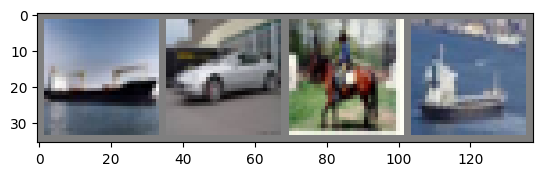

In [14]:
import matplotlib.pyplot as plt
import numpy as np

classes = ("plane", "car", "bird", "cat",
           "deer", "dog", "frog", "horse", "ship", "truck")

def imshow(img):
  img = img / 2 + 0.5 # 역정규화
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1, 2, 0)))


# 무작위로 학습 이미지 추출하기
dataiter = iter(trainloader)
images, labels = next(dataiter)

# 이미지 보여주기
imshow(torchvision.utils.make_grid(images))
# labels 출력하기
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

* 위 셀 스크립트를 실행하면 4개의 이미지와 각 이미지에 대한 정답 label이 출력됨.

### PyTorch 모델 학습
* 위에서 다뤘던 내용을 종합하여 모델을 학습시키겠음.

In [15]:
#%matplotlib inline

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

* 첫째로, 학습 및 테스트 데이터셋이 필요함.
* 아직 다운로드하지 않은 경우, 아래 셀을 실행하여 데이터셋이 다운로드 되었는지 확인하기. (다운로드 시 수 분정도 소요됨.)

In [16]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


* DataLoader 출력을 확인해보겠음.

  cat   cat  deer  frog


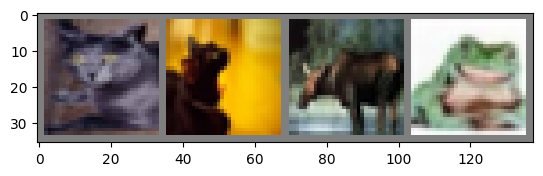

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# 아래 함수는 이미지를 시각화하여 보여주는 함수.

def imshow(img):
  img = img / 2 + 0.5 # 역정규화
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1, 2, 0)))


# 무작위로 학습 이미지를 가져오기
dataiter = iter(trainloader)
images, labels = next(dataiter)

# 이미지 시각화하기
imshow(torchvision.utils.make_grid(images))
# 정답 label 출력하기
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

* 이제 모델을 학습시킬 차례.
* 만약 모델 구조가 익숙하게 보인다면, 이 모델은 이번 영상에서 앞서 다뤄진 3채널(color) 이미지에 맞게 변형된 LeNet 모델이기 때문임.

In [21]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

* 아래는 마지막으로 학습에 필요한 손실 함수 및 최적화 방법.

In [22]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

* 손실 함수(loss function)는 데이터 기반으로 모델이 예측한 정답 값이 얼마나 차이가 나는지를 표현하는 지표.
* Cross-entropy 손실 함수는 일반적인 분류 모델의 전형적인 손실 함수임.

* Optimizer 는 학습의 필수요소임.
* 아래 예제에서 간단한 최적화 알고리즘인 stochastic gradient descent 를 구현하겠음.
* SGD 알고리즘은 학습 속도인 (lr) 및 momentum 과 같은 매개 변수 외에도 모델의 모든 학습 가중치 값인 net.parameters() 를 전달하는데, 이 함수는 최적화를 위해 파라미터를 조정함.

* 마지막으로, 모든 것이 학습 loop에 들어감. 이제 아래 셀을 실행하기.

In [23]:
for epoch in range(2): # 데이터셋을 여러 번 반복 학습함.

  running_loss = 0.0
  for i, data in enumerate(trainloader, 0):
    # 데이터를 통해 이미지와 정답값을 받음.
    inputs, labels = data

    # 초기 기울기 파라미터를 0으로 설정.
    optimizer.zero_grad()

    # forward + backward + optimize
    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    # epoch 및 loss 값을 출력함.
    running_loss += loss.item()
    if i % 2000 == 1999: # 2000 mini-batches 마다 값을 출력함.
      print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
      running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.180
[1,  4000] loss: 1.866
[1,  6000] loss: 1.665
[1,  8000] loss: 1.581
[1, 10000] loss: 1.514
[1, 12000] loss: 1.478
[2,  2000] loss: 1.408
[2,  4000] loss: 1.385
[2,  6000] loss: 1.355
[2,  8000] loss: 1.318
[2, 10000] loss: 1.318
[2, 12000] loss: 1.283
Finished Training


* 예제에서 **학습 에폭 2번**만 반복함. (즉, 학습 데이터셋을 두 번 모델에 통과시킴. 각 패스에는 iterates over the training data (4번째 라인)의 내부 루프가 있어 변환된 입력 이미지의 batch와 올바른 레이블을 제공함.

* **기울기 값 초기화** (9번째 라인)은 중요한 단계. 기울기는 batch에 걸쳐 누적됨. 모든 batch에 대해 기울기 값을 재설정하지 않으면 기울기 값이 계속 누적되어 잘못된 기울기 값을 제공하여 학습이 불가능함.

* 12번째 라인에서는 batch 데이터를 **모델에게 예측을 요청** 함. 다음 13번째라인에서 모델의 결과 값과 정답 값 차이인 손실값을 계산함.

* 14번째 라인에서는 backward() 를 통해 모델의 학습 기울기를 계산.

* 15번째 라인에서는 학습 단계의 최적화를 수행하는데 backward() 를 통해 손실 값을 줄일 수 있는 방향으로 학습 가중치들을 조정함.

* 루프의 나머지 부분은 epoch 횟수, 학습 루프를 통해 수집된 손실 값을 출력함.

* 손실 값은 단조롭게 감소하며, 이는 모델이 훈련 데이터셋에서 성능을 계속 향상시키고 있음을 보여줌.

* 마지막 단계로 모델이 단순하게 학습 데이터셋을 "기억"하는 것이 아니라 실제로 일반화 학습을 잘 수행하고 있는 확인해야 함.
* 이를 **과적합**이라고 부르며 일반적으로 데이터셋이 너무 작거나, 모델이 데이터셋을 올바르게 모델링하는 데 필요한 것보다 더 많은 학습 파라미터 변수를 가지고 있음을 보여줌. (일반적인 학습에 충분한 예제가 아님.)

* 위와 같이 데이터셋이 학습 및 테스트 데이터셋으로 분할되는 이유.
* 모델의 일반성을 테스트하기 위해 학습되지 않은 데이터에 대해 예측하도록 요청함.

In [25]:
correct = 0
total = 0
with torch.no_grad():
  for data in testloader:
    images, labels = data
    outputs = net(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

print('10000개 테스트 이미지에서 모델 정확도: %d %%' % (100 * correct / total))

10000개 테스트 이미지에서 모델 정확도: 55 %
